In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import pandas_profiling as pp


In [2]:
cd=pd.read_csv("college.csv")
cd.head()
pp.ProfileReport(cd)    # Exploratory data analysis

In [3]:
cd.head()

,Unnamed_0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
new_cd=cd.iloc[ : ,1:19]
new_cd.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
# Converting and coding the categorical feature
#Get one hot encoding of the column  private
# Note only run the hot encoding once, if not there wiill be error as the data has been encoded already
one_hot= pd.get_dummies(new_cd["Private"])
one_hot



,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [6]:
#Drop the previous column private as it is now encoded. This also just be done once
new_cd=new_cd.drop("Private", axis=1)
new_cd

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [7]:
new_cd.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
# Join the encoded to dataframe
new_cd=new_cd.join(one_hot)
new_cd

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,No,Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,1
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,0,1
6,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,0,1
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,0,1
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,0,1
9,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,0,1


In [9]:
new_cd.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,No,Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,1


In [10]:
#use minmaxscaler to give EQUAL importance to all the features  
# the alternative to this is using starndard scaler
# it is recommended to standardize the data since the algorithm is based on distance measure
mms=MinMaxScaler()
mms.fit(new_cd)
new_cd2=mms.transform(new_cd)
new_cd2

array([[0.03288693, 0.04417701, 0.10791254, ..., 0.46296296, 0.        ,
        1.        ],
       [0.04384229, 0.07053089, 0.07503539, ..., 0.42592593, 0.        ,
        1.        ],
       [0.0280549 , 0.03903572, 0.04734938, ..., 0.40740741, 0.        ,
        1.        ],
       ...,
       [0.04198863, 0.07018813, 0.10382256, ..., 0.36111111, 0.        ,
        1.        ],
       [0.22127341, 0.09067713, 0.20166745, ..., 0.82407407, 0.        ,
        1.        ],
       [0.06056693, 0.06790312, 0.10319333, ..., 0.82407407, 0.        ,
        1.        ]])

# Elbow analysis to determine the number of clusters to be formed

In [11]:
# finding the number of clusters
#for each i, initialise k-means and use inertia attributes to 
#identify the sum of the squared distances of samples to the centriod

wcss=[]
K= range(1,15)              #14 clusters
for i in K:                 # i simply means the first &it increases along while K is the highest of the range which is 15
    km=KMeans(n_clusters=i, random_state=0)
    km=km.fit(new_cd2)
    wcss.append(km.inertia_)

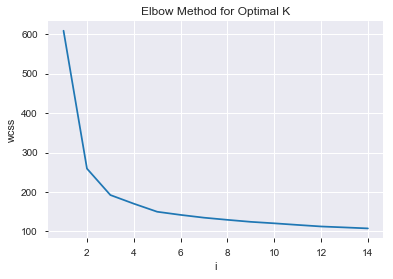

In [12]:
plt.plot(K, wcss)    #or plt.plot(1,15,wcss)
plt.xlabel("i")
plt.ylabel("wcss")
plt.title("Elbow Method for Optimal K")
plt.show()

# Kmean Analysis

In [13]:
K=3
kmeans=KMeans(n_clusters=K).fit(new_cd2)   # This is the kmeans  algorthims detail we are using
#kmeans.centroids
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
y_kmeans=kmeans.fit_predict(new_cd2)
y_kmeans


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1,
       0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2,
       1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2,
       1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

# KMeans Clustering Visualizing

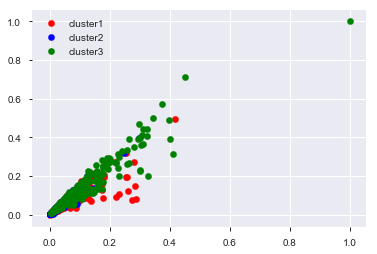

In [15]:
from sklearn.datasets.samples_generator import make_blobs
plt.scatter(new_cd2[y_kmeans==0,0],new_cd2[y_kmeans==0,1],s=40, c="red", label="cluster1")
plt.scatter(new_cd2[y_kmeans==1,0],new_cd2[y_kmeans==1,1],s=40, c="blue", label="cluster2")
plt.scatter(new_cd2[y_kmeans==2,0],new_cd2[y_kmeans==2,1],s=40, c="green", label="cluster3")
plt.legend()

# another method of doing the visualisation

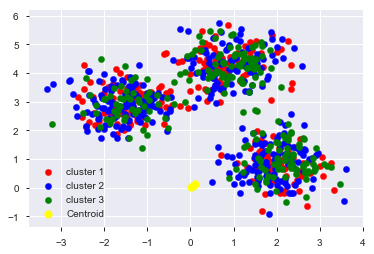

In [16]:
from sklearn.datasets.samples_generator import make_blobs
new_cd2, y_true= make_blobs(n_samples=777, centers=3,cluster_std=0.60, random_state=0)
plt.scatter  (new_cd2[y_kmeans==0,0],new_cd2[y_kmeans==0, 1] ,s=40, c="red", label="cluster 1")
plt.scatter    (new_cd2[y_kmeans==1,0],new_cd2[y_kmeans==1, 1] ,s=40, c="blue", label="cluster 2")
plt.scatter  (new_cd2[y_kmeans==2,0],new_cd2[y_kmeans==2,1] ,s=40, c="green", label="cluster 3")
plt.scatter(kmeans.cluster_centers_[ :,0],kmeans.cluster_centers_[ :,1], s=60,
        c="yellow", label="Centroid")
#  Note s= size of the blob, c=colour, label= name that will be in the legend
plt.legend()

# Another method of Visualisation of Clusters

In [ ]:
from sklearn.cluster import KMeans
plt.plot()
plt.xlim(0,16)   # this is x axis lenght size
plt.ylim(0,16)    # this is y axis  lenght size
plt.title("KMeans Analysis Graph")
center=kmeans.cluster_center
plt.scatter(centers[ :,0],centers[ :,1], c="black", s=777, alpha=0.5);
#plt.show()